In [1]:
from bosonicplus.base import State
from bosonicplus.states.coherent import order_infidelity_fock_coherent, gen_fock_superpos_coherent
from bosonicplus.states.nongauss import prepare_fock_coherent
from bosonicplus.states.wigner import wig_mn
from bosonicplus.states.gkp_squeezing import gkp_nonlinear_squeezing_operator

from bosonicplus.plotting import plot_wig
from bosonicplus.fidelity import fidelity_with_wigner
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation, FuncAnimation
from IPython.display import HTML

from math import factorial

In [4]:
def make_animation(N, save =True, xmax=6, xres=200, epsilons = np.linspace(0.5,4,30)):

    hbar =2 
    fig, ax = plt.subplots(figsize = (5,5))
    
    #x = np.sqrt(sf.hbar)*np.linspace(-6,6,400)
    x = np.sqrt(hbar)*np.linspace(-xmax,xmax,xres)
    X, P = np.meshgrid(x,x )
    W_fock = wig_mn(N,N, X, P)
    
    ims = []
    for i, eps in enumerate(epsilons):
        #data = gen_fock_coherent(N, 1, eps)
        #covs, means, weights = data
        state = prepare_fock_coherent(N,1,eps)
        W = state.get_wigner(x,x)
    
        infid = order_infidelity_fock_coherent(N, eps)
        #W = get_wigner_coherent_comb(data, x, x)
        im = plot_wig(ax, W, x, x, colorbar = False)
        
        Drawing_uncolored_circle = plt.Circle( (0,0 ), np.sqrt(2*hbar)*eps ,fill = False, color = 'black' , linestyle='dashed',linewidth=2)
    
        theta = 2*np.pi/(N+1)
        betas = np.zeros(N+1, dtype='complex')
        
        for l in np.arange(N+1):
            betas[l] = eps * np.exp(1j * theta * l)
            
            
        im_gs = ax.scatter(np.sqrt(hbar*2)*betas.real, np.sqrt(hbar*2)*betas.imag, marker='o',color='k')
        
        #im_arrow = ax.arrow(0, 0, np.sqrt(2*sf.hbar)*eps, 0, color = 'red', linewidth = 2, head_width = 0.2, head_length = 0)
        im_eps = ax.text(2, 3.5, rf'$\epsilon = {np.round(eps,3)}$', size = 12)
         
        ax.set_aspect(1)
        im_circ = ax.add_artist(Drawing_uncolored_circle )
    
        fid = fidelity_with_wigner(W_fock, W, x, x).real
        ax.set_axis_off
        title = ax.text(0.25,1.01,r' $\mathcal{F}= $'+'{:.5f} with Fock {}'.format(fid,N),transform=ax.transAxes, fontsize =12 )
        ims.append([im, im_circ, im_gs, im_eps, title])
    
    ims.reverse() #From large to small eps
    ani = ArtistAnimation(fig, ims,interval = 150, blit = True,repeat=True)
    if save:
        ani.save(f'animations/Fock{N}.mp4')
    return ArtistAnimation(fig, ims,interval = 150, blit = True,repeat=True)






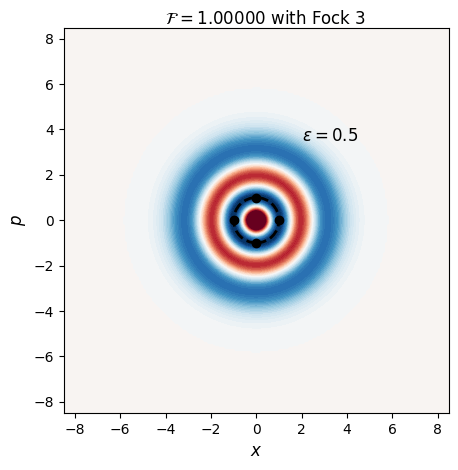

In [5]:
#ani = ArtistAnimation(fig, ims,interval = 150, blit = True,repeat=True)
HTML(make_animation(3).to_html5_video())

In [6]:
def make_animation_gkp(N, grid, eig = 0, scale = 1, save = False, xmax=6, xres=250, epsilons = np.linspace(0.6,4,30)):

    hbar = 2
    fig, ax = plt.subplots(figsize = (5,5))
    
    x = np.sqrt(hbar)*np.linspace(-xmax,xmax,xres)

    rho = gkp_nonlinear_squeezing_operator(N, scale, grid)
    w, v = np.linalg.eigh(rho)
    coeffs = v[:,eig] #eigs always sorted from lowest to highest eigenvalue, choose lowest
    
    ims = []
    for i, eps in enumerate(epsilons):

      
        data = gen_fock_superpos_coherent(coeffs, 1, eps)
        gkp = State(1)
        gkp.update_data(data)
        
        #covs, means, weights = data
    
        #infid = order_infidelity_fock_coherent(N, eps)
        #W = get_wigner_coherent_comb(data, x, x)
        W = gkp.get_wigner(x,x)
        im = plot_wig(ax, W, x, x, colorbar = False)
        
        Drawing_uncolored_circle = plt.Circle( (0,0 ), np.sqrt(2*hbar)*eps ,fill = False, color = 'black' , linestyle='dashed',linewidth=2)
    
        theta = 2*np.pi/(N+1)
        betas = np.zeros(N+1, dtype='complex')
       
        for l in np.arange(N+1):
            betas[l] = eps * np.exp(1j * theta * l)
            
            
        im_gs = ax.scatter(np.sqrt(hbar*2)*betas.real, np.sqrt(hbar*2)*betas.imag, marker='o',color='k')
        
        #im_arrow = ax.arrow(0, 0, np.sqrt(2*sf.hbar)*eps, 0, color = 'red', linewidth = 2, head_width = 0.2, head_length = 0)
        im_eps = ax.text(2, 3.5, rf'$\epsilon = {np.round(eps,3)}$', size = 12)
         
        ax.set_aspect(1)
        im_circ = ax.add_artist(Drawing_uncolored_circle )
    
        #fid = fidelity_with_wigner(W_fock, W, x, x).real
        ax.set_axis_off
        
        #ims.append([im, im_circ, im_gs, im_eps, title])
        ims.append([im, im_circ, im_gs, im_eps])
    title = ax.text(0.25,1.01,r'GKP {} with {} photons'.format(grid,N),transform=ax.transAxes, fontsize =12 )
    ims.reverse() #From large to small eps
    ani = ArtistAnimation(fig, ims,interval = 150, blit = True,repeat=True)
    if save:
        ani.save(f'animations/GKP{grid}_{N}.mp4')
    return ArtistAnimation(fig, ims,interval = 150, blit = True,repeat=True)






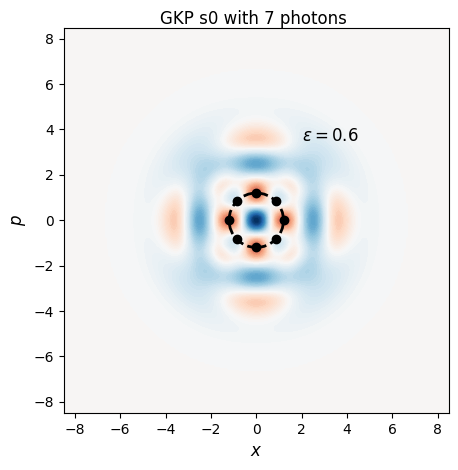

In [7]:
HTML(make_animation_gkp(7,'s0', eig=0, scale = 2, save=False).to_html5_video())